# Multivariate Multistep TimeSeries 실습

- 가구의 Energy 사용량 예측

- Household Power Consumption Dataset 은 한 가구의 4 년간 전력소비를 나타내는 multivariate time series dataset 임

- data 수집기간은 2006 Dec 에서 2010 Nov 까지의 분 단위 관측값 2075259 개로 구성

- variables :  



    - global active power: 가구에서 소비한 총 유효전력 (total active power, kilowatts).
    - global reactive power: 가구에서 소비한 총 무효전력 (total reactive power, kilowatts).
    - voltage: 평균 voltage (volts).
    - global intensity: 평균 전류 밀도 (amps).
    - sub metering 1: 주방에서 사용된 active energy (watt-hours of active energy).
    - sub metering 2: 세탁에 사용된 active energy (watt-hours of active energy).
    - sub metering 3: 공조기 제어 시스템에 사용된 active energy (watt-hours of active energy).

- 기타 다른 곳에서 시용된 active energy $\left(\frac{global\_act\_pwr  \times  1000}{60}\right) - \left(sub met 1 + sub met 2 + sub met 3\right) $ 

- https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption 의 UCI ML repository 참조  


- missing value 는 '?' 로 채워져 있음

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [5]:
!gdown --id 1R9KghtoqCfJm55Ab8Vc0Yzqonrd7zG9n

Downloading...
From: https://drive.google.com/uc?id=1R9KghtoqCfJm55Ab8Vc0Yzqonrd7zG9n
To: /content/household_power_consumption.txt
100% 133M/133M [00:00<00:00, 138MB/s]


In [8]:
dataset = pd.read_csv('/content/household_power_consumption.txt', sep=';', 
                      header=0, infer_datetime_format=True, 
                    low_memory=False, parse_dates={'datetime': [0, 1]}, 
                    index_col=['datetime'])

print(dataset.shape)
print(dataset.info())
dataset.head()

(2075259, 7)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB
None


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


**missing value mark 를 np.nan 으로 replace 하여 float data type 변환**

In [9]:
dataset.replace('?', np.nan, inplace=True)

**기타 다른 곳에서 사용된 energy column 추가**

In [10]:
values = dataset.values.astype('float32')
dataset['Sub_metering_4'] = (values[:, 0] * 1000 / 60) - (values[:, 4] + values[:, 5] + values[:, 6])

**csv file 로 중간 저장**

In [12]:
dataset.to_csv("household_power_consumption.csv")

In [14]:
dataset = pd.read_csv("household_power_consumption.csv", infer_datetime_format=True, 
                      parse_dates=['datetime'], index_col=['datetime'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Sub_metering_4         float64
dtypes: float64(8)
memory usage: 142.5 MB


In [15]:
print(dataset.isna().sum())
dataset[dataset.isna() == True].head()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Sub_metering_4           25979
dtype: int64


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 17:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 17:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 17:27:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 17:28:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

#### multivariate data 이므로 각각의 변수에 대해 line plot 을 그려 비교 (기간 : 2006 Dec 에서 2010 Nov 까지)

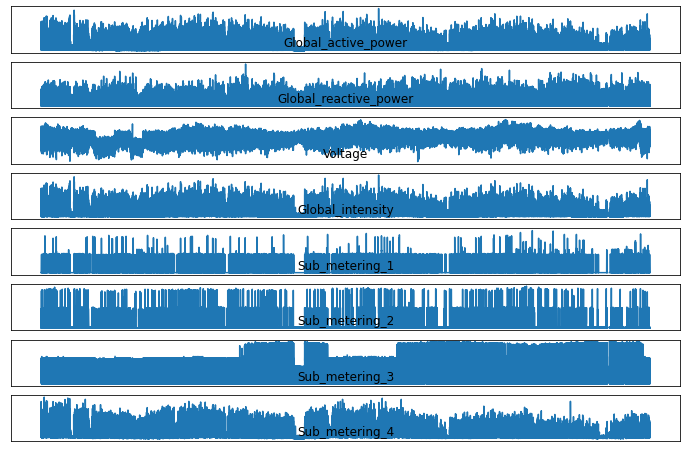

In [16]:
plt.figure(figsize=(12, 8))
for i in range(len(dataset.columns)):
    plt.subplot(len(dataset.columns), 1, i+1)
    name = dataset.columns[i]
    plt.plot(dataset[name])
    plt.title(name, y=0)
    plt.xticks([])
    plt.yticks([])

## 개별 변수에 대하여 분석

#### Global_active_power 를 연도별로 plot

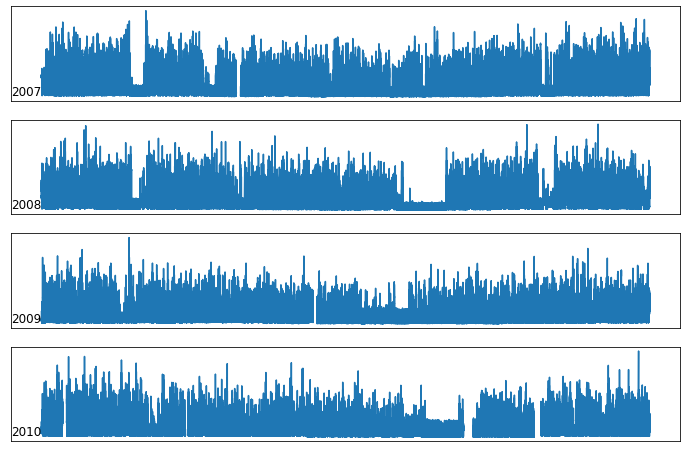

In [17]:
years = ['2007', '2008', '2009', '2010']

plt.figure(figsize=(12, 8))
for i in range(len(years)):
    ax = plt.subplot(len(years), 1, i+1)
    ax.plot(dataset[years[i]]['Global_active_power'])
    ax.set_title(years[i], y=0, loc='left')
    ax.set_xticks([])
    ax.set_yticks([])

#### Global_active_power 를 특정연도(2007) 의 월별로 plot

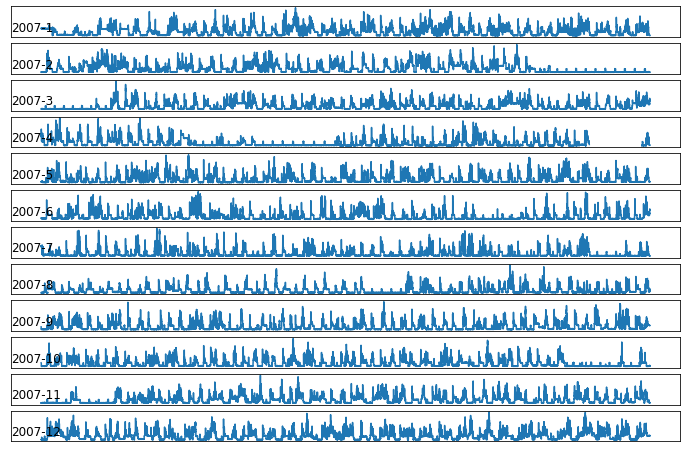

In [18]:
months = [i for i in range(1, 13)]
plt.figure(figsize=(12, 8))
for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i+1)
    month = '2007-' + str(months[i])
    result = dataset[month]
    ax.plot(result['Global_active_power'])
    ax.set_title(month, y=0, loc='left')
    ax.set_xticks([])
    ax.set_yticks([])

#### Global_active_power 를 특정연도(2007) 의 특정월(January)의 일별로 plot

- first 20 days

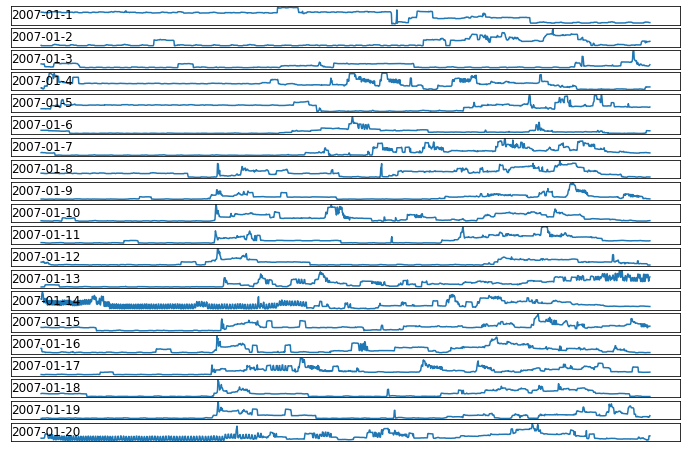

In [19]:
days = [i for i in range(1, 21)]

plt.figure(figsize=(12, 8))
for i in range(len(days)):
    ax = plt.subplot(len(days), 1, i+1)
    day = '2007-01-' + str(days[i])
    result = dataset[day]
    ax.plot(result['Global_active_power'])
    ax.set_title(day, y=0, loc='left')
    ax.set_xticks([])
    ax.set_yticks([])

## Problem Framing

- Multivariate multi-step forecasting

    - next week 의 daily 사용량(global active power) 예측  
    - next month 의 daily 사용량(global active power) 예측  
    - next year 의 monthly 사용량(global active power) 예측 
    
    
- daily total 이 계산되어 있으면 편리하므로 분단위 data 를 일단위 data 로 downsampling 한다.  

- resample('D') 이용

In [20]:
daily_groups = dataset.resample('D')
daily_groups

In [21]:
daily_data = daily_groups.sum()

print(daily_data.shape)
daily_data.head()

(1442, 8)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011


In [22]:
weekly_groups = dataset.resample('W')
weekly_groups

weekly_data = weekly_groups.sum()

print(weekly_data.shape)
weekly_data.head()

(207, 8)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-17,4599.636,260.928,439277.85,19579.4,2033.0,4733.0,18267.0,51627.600051
2006-12-24,17477.128,1176.174,2432524.18,73992.4,11190.0,21351.0,77447.0,181297.466763
2006-12-31,19736.518,1452.334,2437971.19,83023.0,14237.0,22628.0,67237.0,224839.966614
2007-01-07,14961.068,1348.954,2428490.09,63122.2,5857.0,17599.0,54193.0,171702.133319
2007-01-14,16176.334,1590.284,2421684.62,68851.0,13420.0,18989.0,83356.0,153840.566654


## LSTM Multivatiate Multi-step Input and Single-step output

- next week 의 daily 사용량 예측 이므로 window_size = 7 으로 하고 daily_data 사용

In [23]:
daily_data.values.shape

(1442, 8)

In [25]:
d_train, d_test = daily_data.values[:-328], daily_data.values[-328:]
print(d_train.shape)
print(d_test.shape)

(1114, 8)
(328, 8)


In [26]:
sc = StandardScaler()
d_train_scaled = sc.fit_transform(d_train)
d_test_scaled = sc.transform(d_test)

In [27]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda w: w.batch(window_size+1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda w: (w[:-1], w[-1][0:1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [28]:
window_size = 7
n_features = 8
shuffle_buffer = 100
batch_size = 1
train_set = windowed_dataset(d_train_scaled, window_size, batch_size, shuffle_buffer)
test_set = windowed_dataset(d_test_scaled, window_size, batch_size, shuffle_buffer)
print(train_set)
print(test_set)

<PrefetchDataset shapes: ((None, None, 8), (None, 1)), types: (tf.float64, tf.float64)>
<PrefetchDataset shapes: ((None, None, 8), (None, 1)), types: (tf.float64, tf.float64)>


In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(200, input_shape=(window_size, 8), return_sequences=True),
    tf.keras.layers.LSTM(200),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 200)            167200    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 508,201
Trainable params: 508,201
Non-trainable params: 0
_________________________________________________________________


In [30]:
%%time
history = model.fit(train_set, epochs=50, verbose=2)

Epoch 1/50
1107/1107 - 10s - loss: 0.6206 - 10s/epoch - 9ms/step
Epoch 2/50
1107/1107 - 4s - loss: 0.5712 - 4s/epoch - 4ms/step
Epoch 3/50
1107/1107 - 4s - loss: 0.5193 - 4s/epoch - 4ms/step
Epoch 4/50
1107/1107 - 4s - loss: 0.5040 - 4s/epoch - 4ms/step
Epoch 5/50
1107/1107 - 4s - loss: 0.5367 - 4s/epoch - 4ms/step
Epoch 6/50
1107/1107 - 4s - loss: 0.4570 - 4s/epoch - 4ms/step
Epoch 7/50
1107/1107 - 4s - loss: 0.4413 - 4s/epoch - 4ms/step
Epoch 8/50
1107/1107 - 4s - loss: 0.4116 - 4s/epoch - 4ms/step
Epoch 9/50
1107/1107 - 4s - loss: 0.3844 - 4s/epoch - 4ms/step
Epoch 10/50
1107/1107 - 4s - loss: 0.3828 - 4s/epoch - 4ms/step
Epoch 11/50
1107/1107 - 4s - loss: 0.3468 - 4s/epoch - 4ms/step
Epoch 12/50
1107/1107 - 4s - loss: 0.3126 - 4s/epoch - 4ms/step
Epoch 13/50
1107/1107 - 4s - loss: 0.2873 - 4s/epoch - 4ms/step
Epoch 14/50
1107/1107 - 4s - loss: 0.2677 - 4s/epoch - 4ms/step
Epoch 15/50
1107/1107 - 4s - loss: 0.2102 - 4s/epoch - 4ms/step
Epoch 16/50
1107/1107 - 4s - loss: 0.1914 - 4s/

In [31]:
d_test.shape

(328, 8)

In [32]:
y_test = [day[0] for day in d_test_scaled]
np.array(y_test).shape

(328,)

In [33]:
prediction = model.predict(test_set)
prediction.shape

(321, 1)

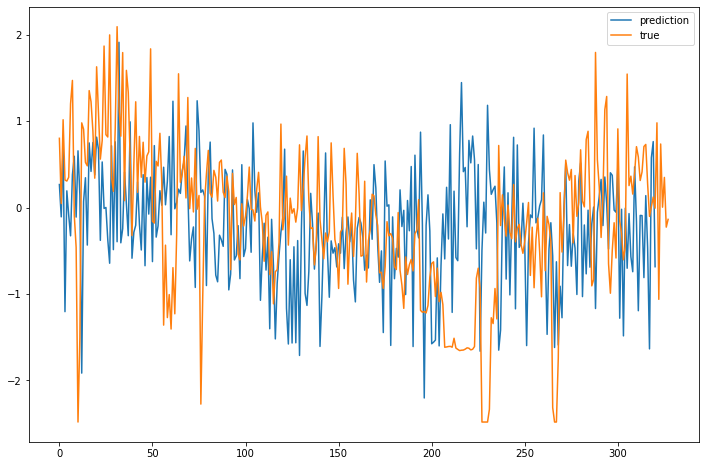

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(prediction, label='prediction')
plt.plot(y_test, label='true')
plt.legend()